## Script for plotting tensorboard information as well as smoothing

In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import tensorboard as tb

## F it, down A

In [235]:
folder = "Henry_GRL/"
file1, file2, file3, file4 = folder + "reward1.csv", folder + "reward2.csv", folder + "loss1.csv", folder + "loss2.csv"
converters = {"Step":int, "Value":float}
reward1, reward2 = pd.read_csv(file1, converters=converters), pd.read_csv(file2, converters=converters)
loss1, loss2 = pd.read_csv(file3, converters=converters), pd.read_csv(file4, converters=converters)

In [236]:
reward2["Step"] += reward1["Step"].iloc[-1]
reward2["Wall time"] += reward1["Wall time"].iloc[-1]
loss2["Step"] += loss1["Step"].iloc[-1]
loss2["Wall time"] += loss1["Wall time"].iloc[-1]



In [237]:
reward = pd.concat([reward1, reward2], axis=0)

In [238]:
reward = reward[reward.Step <= 920000]

In [239]:
reward.to_csv("reward_final.csv")

In [240]:
loss = pd.concat([loss1, loss2], axis=0)

In [241]:
loss = loss[loss.Step <= 920000]
loss.to_csv("loss_final.csv")

In [242]:
folders = ["Henry_GRL", "RL_Board"]
topics = ["reward", "loss"]
dfs = {}

In [243]:
for folder in folders:
    dfs[folder] = {}
    for topic in topics:
        file = folder + "/" + topic + ".csv"
        df = pd.read_csv(file, converters={"Step":int, "Value":float})
        dfs_ = df.ewm(alpha=0.1).mean()
        df["Episodes"] = dfs_["Episodes"] = (df["Step"] / 1440).round(decimals=0)
        dfs[folder][topic] = df
        dfs[folder][topic+"_smoothed"] = dfs_
        

reward
loss
reward
loss


<AxesSubplot:xlabel='Episodes', ylabel='Reward'>

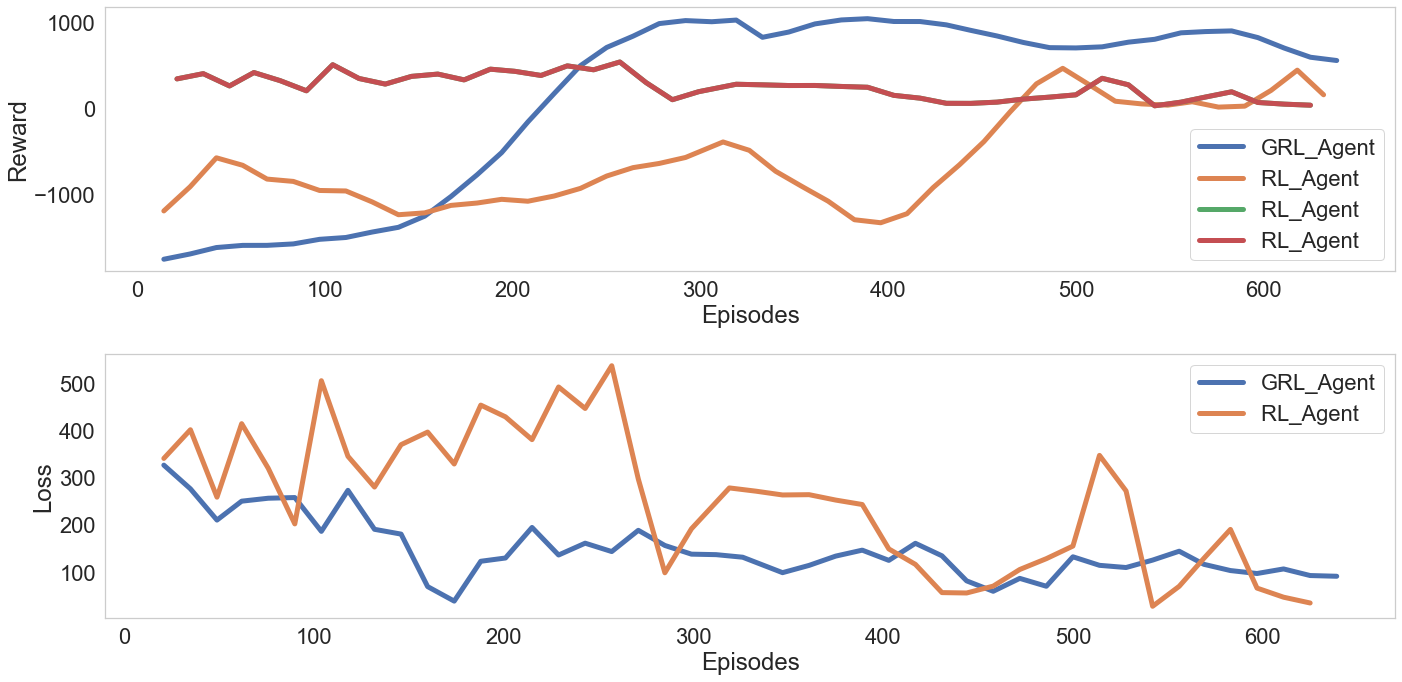

<Figure size 432x288 with 0 Axes>

In [244]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
labels = {"GRL_Board" : "GRL_Agent ", "RL_Board" : "RL_Agent ", "Henry_GRL" : "GRL_Agent"}
markers = {"GRL_Board" : "o", "RL_Board" : "D"}
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})
axes[0].grid(False)
bdfs = []
for folder in folders:
    for topic in topics:
        df = dfs[folder][topic]
        dfs_ = dfs[folder][topic+"_smoothed"]
        print(topic)
        
        if topic in ["reward"]:
            sns.lineplot(data=df, x="Episodes", y="Value", label=labels[folder], ax=axes[0], linewidth=5)
        if topic in ["loss"]:
            sns.lineplot(data=df, x="Episodes", y="Value", label=labels[folder], ax=axes[1], linewidth=5)

axes[0].set_ylabel("Reward")
# axes[0].set_xlabel("Episodes", fontsize=20)
axes[1].set_ylabel("Loss")
# axes[1].set_xlabel("Episodes", fontsize=20)

plt.tight_layout()
plt.savefig("reward.png", dpi=600)

plt.figure()
sns.lineplot(data=df, x="Episodes", y="Value", label=labels[folder], ax=axes[0], linewidth=5)
sns.lineplot(data=df, x="Episodes", y="Value", label=labels[folder], ax=axes[0], linewidth=5)


### Box plots

In [245]:
file = "test_results.csv"
df = pd.read_csv(file, converters={"Agent":str, "Reward":float, "Collisions":float, "Delay":float,
                                  "Good Takeoffs":float, "Good Landings":float, "Battery":float, "Step Time":float})

In [246]:
import numpy as np
df["Episode"] = np.arange(100)
df["Episode"][50:101] = np.arange(50)
df["Problem"] = "UAM-VSM"
df

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Agent,Reward,Collisions,Delay,Good Takeoffs,Good Landings,Battery,Step Time,Episode,Problem
0,GRL,-298.564348,24.0,415.307487,301.0,1.0,31.063252,0.125662,0,UAM-VSM
1,GRL,-2476.381834,7.0,5496.361828,69.0,2.0,7.388628,0.140412,1,UAM-VSM
2,GRL,-1786.114991,14.0,10134.522433,150.0,2.0,14.363108,0.133619,2,UAM-VSM
3,GRL,-587.684020,33.0,14390.480775,266.0,2.0,28.239975,0.128505,3,UAM-VSM
4,GRL,-2368.451831,5.0,19450.050546,81.0,1.0,8.556921,0.137977,4,UAM-VSM
...,...,...,...,...,...,...,...,...,...,...
95,RL,-1837.993454,0.0,97233.258541,14.0,5.0,26.979370,0.060926,45,UAM-VSM
96,RL,-1942.630755,0.0,99263.474824,5.0,4.0,26.437923,0.059948,46,UAM-VSM
97,RL,-2006.301886,0.0,101234.468814,1.0,2.0,26.043755,0.058333,47,UAM-VSM
98,RL,-1994.501776,1.0,103184.541246,5.0,1.0,26.284887,0.057960,48,UAM-VSM


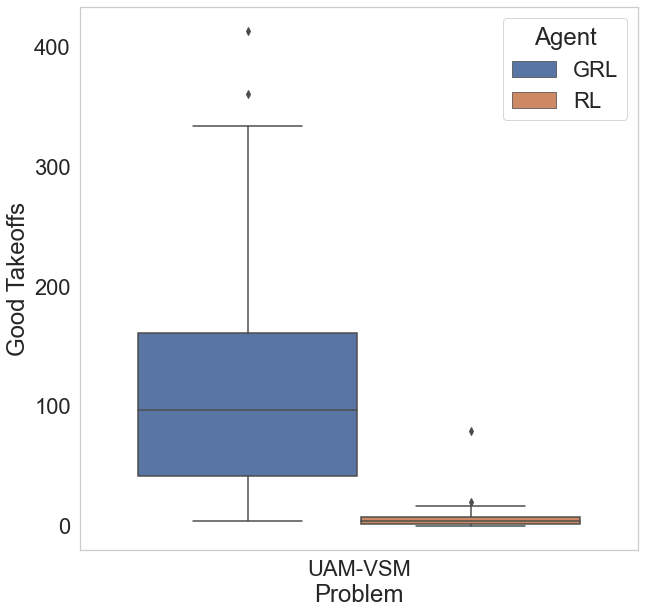

In [247]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, hue="Agent", y="Good Takeoffs", x="Problem", ax=ax)
plt.show()

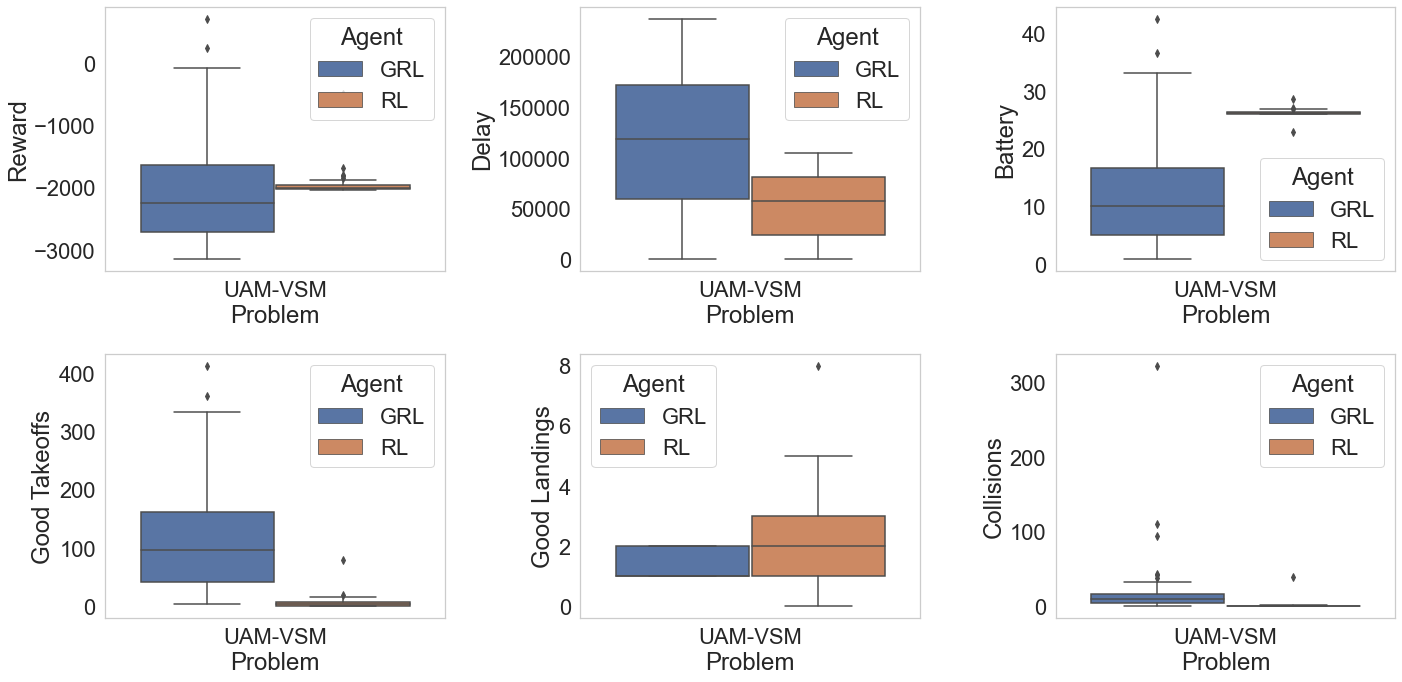

In [248]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
sns.boxplot(data=df, hue="Agent", y="Reward", x="Problem", ax=axes[0, 0])
sns.boxplot(data=df, hue="Agent", y="Delay", x="Problem", ax=axes[0, 1])
sns.boxplot(data=df, hue="Agent", y="Battery", x="Problem", ax=axes[0, 2])
sns.boxplot(data=df, hue="Agent", y="Good Takeoffs", x="Problem", ax=axes[1, 0])
sns.boxplot(data=df, hue="Agent", y="Good Landings", x="Problem", ax=axes[1, 1])
sns.boxplot(data=df, hue="Agent", y="Collisions", x="Problem", ax=axes[1, 2])

plt.tight_layout()
plt.savefig("metrics.png", dpi=300)

## Time to see the variation in the data

In [273]:
file = "test_results2.csv"
df = pd.read_csv(file, converters={"Agent":str, "Reward":float, "Collisions":float, "Delay":float,
                                  "Good Takeoffs":float, "Good Landings":float, "Battery":float, "Step Time":float})

In [274]:
GRL = df[:50]
RL = df[50:]

In [279]:
print(GRL)
print(RL)
GRL["Delay"][29] = GRL["Delay"][28] + 3000

   Agent       Reward  Collisions          Delay  Good Takeoffs  \
0    GRL -1973.102064         0.0    1123.077949            5.0   
1    GRL  1060.295559         0.0    3868.936796          146.0   
2    GRL   963.772144         0.0    6842.682675          105.0   
3    GRL -1224.780964         0.0   10571.168414           40.0   
4    GRL   122.692554         0.0   14347.972617           88.0   
5    GRL   -25.236079         0.0   17640.989307           73.0   
6    GRL   107.164053         0.0   20488.227669           87.0   
7    GRL -1565.307082         0.0   23091.009380           21.0   
8    GRL  1104.614014         0.0   25676.582118          158.0   
9    GRL  1125.198005         0.0   28576.352283          155.0   
10   GRL -1903.192427         0.0   32121.441770            2.0   
11   GRL   892.510701         0.0   35332.210461           98.0   
12   GRL -1254.124393         0.0   39490.389918           58.0   
13   GRL   986.370227         0.0   42887.886062          139.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [267]:
print(GRL.var())
print("------------------------")
print(RL.var())
print("------------------------")
print(GRL.mean())
print("------------------------")
print(RL.mean())

Reward           1.452680e+06
Collisions       3.820408e-01
Delay            2.298307e+09
Good Takeoffs    3.638589e+03
Good Landings    3.621265e+01
Battery          2.573863e+02
Step Time        2.163041e-04
dtype: float64
------------------------
Reward           4.901085e+04
Collisions       3.071684e+01
Delay            1.011459e+09
Good Takeoffs    1.339167e+02
Good Landings    2.194728e+00
Battery          4.275512e-01
Step Time        1.312247e-03
Problem                   NaN
dtype: float64
------------------------
Reward            -188.932115
Collisions           0.160000
Delay            80286.087417
Good Takeoffs       85.320000
Good Landings        5.460000
Battery             28.403781
Step Time            0.089015
dtype: float64
------------------------
Reward           -1939.934620
Collisions           1.306122
Delay            54706.787704
Good Takeoffs        6.428571
Good Landings        2.183673
Battery             26.274876
Step Time            0.065535
Problem   

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeEr

In [280]:
RL["Delay"] = RL["Delay"].diff().fillna(RL["Delay"])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [281]:
GRL["Delay"] = GRL["Delay"].diff().fillna(GRL["Delay"])
GRL

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Agent,Reward,Collisions,Delay,Good Takeoffs,Good Landings,Battery,Step Time,Problem
0,GRL,-1973.102064,0.0,1123.077949,5.0,2.0,2.877097,0.097492,UAM-VSM
1,GRL,1060.295559,0.0,2745.858847,146.0,1.0,40.948050,0.078213,UAM-VSM
2,GRL,963.772144,0.0,2973.745879,105.0,1.0,40.755029,0.077452,UAM-VSM
3,GRL,-1224.780964,0.0,3728.485739,40.0,1.0,14.186339,0.088119,UAM-VSM
4,GRL,122.692554,0.0,3776.804203,88.0,10.0,38.013060,0.081670,UAM-VSM
5,GRL,-25.236079,0.0,3293.016690,73.0,11.0,38.049555,0.082838,UAM-VSM
6,GRL,107.164053,0.0,2847.238362,87.0,12.0,38.112233,0.081458,UAM-VSM
7,GRL,-1565.307082,0.0,2602.781711,21.0,4.0,9.974165,0.096564,UAM-VSM
8,GRL,1104.614014,0.0,2585.572739,158.0,1.0,41.135269,0.077990,UAM-VSM
9,GRL,1125.198005,0.0,2899.770164,155.0,1.0,40.877465,0.074996,UAM-VSM


In [284]:
final = pd.concat([GRL, RL], axis = 0)
final["Problem"] = "UAM-VSM"

In [286]:
final.to_csv("test_fixed_delay.csv")

In [288]:
GRL = final[:50]
RL = final[50:]
print(GRL.std())
print("------------------------")
print(RL.std())
print("------------------------")
print(GRL.mean())
print("------------------------")
print(RL.mean())

Reward           1205.271689
Collisions          0.618095
Delay             977.922768
Good Takeoffs      60.320721
Good Landings       6.017695
Battery            16.043264
Step Time           0.014707
dtype: float64
------------------------
Reward            221.383947
Collisions          5.542277
Delay            1152.075356
Good Takeoffs      11.572237
Good Landings       1.481461
Battery             0.653874
Step Time           0.036225
dtype: float64
------------------------
Reward           -188.932115
Collisions          0.160000
Delay            3279.559035
Good Takeoffs      85.320000
Good Landings       5.460000
Battery            28.403781
Step Time           0.089015
dtype: float64
------------------------
Reward          -1939.934620
Collisions          1.306122
Delay            2144.939623
Good Takeoffs       6.428571
Good Landings       2.183673
Battery            26.274876
Step Time           0.065535
dtype: float64


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calli

0     -26.306080
1     -26.275554
2     -25.610055
3     -25.095723
4     -25.478377
         ...    
195    14.231506
196    15.051722
197    16.691796
198    13.233348
199    15.214193
Name: Reward, Length: 200, dtype: float64

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\ap

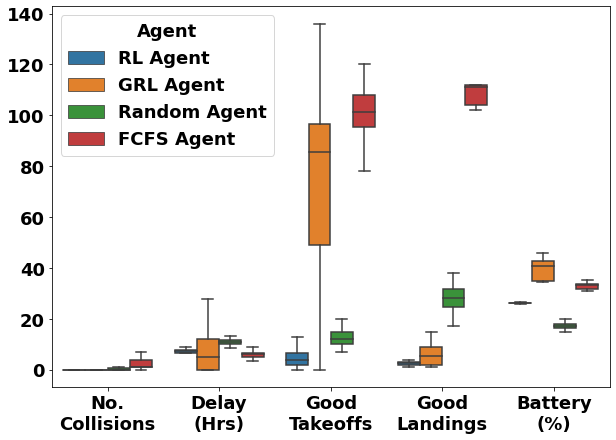

In [11]:
from matplotlib import rc, rcParams

perfect_jobs = list()
perfect_job_rl = list()
perfect_job_grl = list()

SMALL_SIZE = 18
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(10,7))
# ax.legend(handlelength=4, handleheight=4,loc='upper left')

# plt.figure(figsize=(10,10))
sns.set_palette(sns.color_palette("tab10"))

df = pd.read_csv("test_results_case1.csv")
# df1 = pd.read_csv("test_results_random_walk_final.csv")

# df = df.append(df1)

df_z_scaled = df.copy()
  
# apply normalization technique to Column 1
column = 'Reward'
scaler = 20
df[column] = ((df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()) * scaler
  
# view normalized data  
display(df["Reward"])


df["Delay"] = df["Delay"].div(60).round(2)
df["Agent"][:50] = "RL Agent"
df["Agent"][50:100] = "GRL Agent"
df["Agent"][100:150] = "Random Agent"
df["Agent"][150:200] = "FCFS Agent"
#fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data = pd.melt(df, id_vars=["Agent", "Reward", "Step Time", "Problem"], var_name="Number")


sns.boxplot(x = data["Number"],y=data["value"], hue=data["Agent"], showfliers=False)


# for legend title
# labels = ax.get_yticklabels()
plt.yticks(fontweight="bold")
plt.xticks([0, 1, 2, 3, 4], ["No.\nCollisions", "Delay\n(Hrs)", "Good\nTakeoffs", "Good\nLandings", "Battery\n(%)"], fontweight="bold")
labels=["RL Agent", "GRL Agent", "Random Agent", "FCFS Agent"]
plt.xlabel("")
plt.ylabel("")
# plt.ylim(0, 100)
plt.savefig('case1_plot_final.png', bbox_inches='tight', pad_inches=0, dpi = 400)  

plt.show()

0      2.652608
1     12.106241
2      8.270078
3      1.633983
4     -8.430967
        ...    
95   -20.437728
96     7.796052
97    15.107067
98    -7.357483
99    -6.637926
Name: Reward, Length: 100, dtype: float64

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


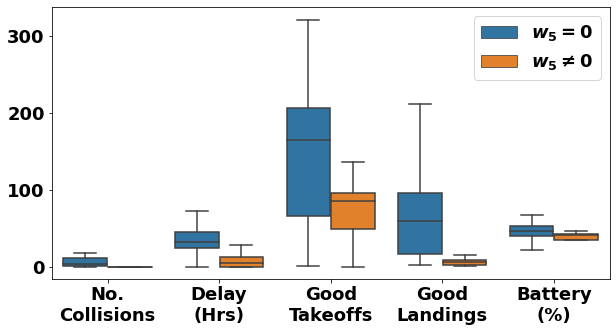

In [10]:
from matplotlib import rc, rcParams

perfect_jobs = list()
perfect_job_rl = list()
perfect_job_grl = list()

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

SMALL_SIZE = 18
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(10,5))
# ax.legend(handlelength=4, handleheight=4,loc='upper left')

# plt.figure(figsize=(10,10))
sns.set_palette(sns.color_palette("tab10"))

df = pd.read_csv("test_results_case2.csv")
# df1 = pd.read_csv("test_results_random_walk_final.csv")

# df = df.append(df1)

df_z_scaled = df.copy()
  
# apply normalization technique to Column 1
column = 'Reward'
scaler = 20
df[column] = ((df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()) * scaler
  
# view normalized data  
display(df["Reward"])


df["Delay"] = df["Delay"].div(60).round(2)
df["Agent"][:50] = "$w_{5} = 0$"
df["Agent"][50:100] = r"$w_{5} \neq 0$"

#fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data = pd.melt(df, id_vars=["Agent", "Reward","Step Time", "Problem"], var_name="Number")


p = sns.boxplot(x = data["Number"],y=data["value"], hue=data["Agent"], showfliers=False)
p.legend_.set_title(None)
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:])

# for legend title
# labels = ax.get_yticklabels()
plt.xticks([0, 1, 2, 3, 4], ["No.\nCollisions", "Delay\n(Hrs)", "Good\nTakeoffs", "Good\nLandings", "Battery\n(%)"], weight="bold")
labels=["RL Agent", "GRL Agent", "Random Agent", "FCFS Agent"]
plt.xlabel("")
plt.ylabel("")
# plt.ylim(0, 100)
plt.savefig('case2_final_plot.png', bbox_inches='tight', pad_inches=0, dpi = 400)  

plt.show()

0     -26.306080
1     -26.275554
2     -25.610055
3     -25.095723
4     -25.478377
         ...    
195    14.231506
196    15.051722
197    16.691796
198    13.233348
199    15.214193
Name: Reward, Length: 200, dtype: float64

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\ap

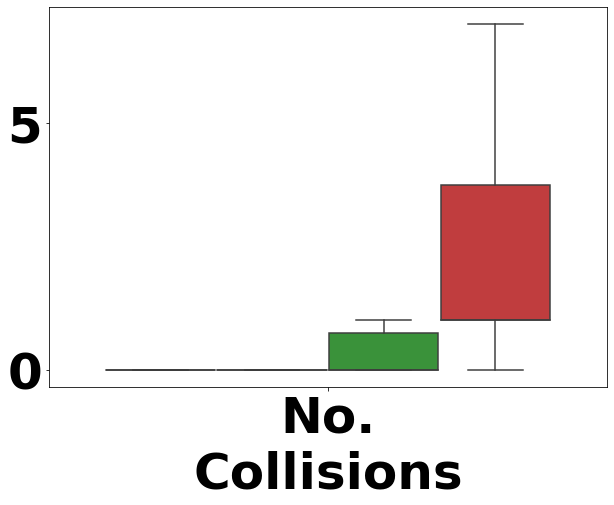

In [12]:
from matplotlib import rc, rcParams

perfect_jobs = list()
perfect_job_rl = list()
perfect_job_grl = list()


SMALL_SIZE = 50
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(10,7))
# ax.legend(handlelength=4, handleheight=4,loc='upper left')

# plt.figure(figsize=(10,10))
sns.set_palette(sns.color_palette("tab10"))

df = pd.read_csv("test_results_case1.csv")
# df1 = pd.read_csv("test_results_random_walk_final.csv")

# df = df.append(df1)

df_z_scaled = df.copy()
  
# apply normalization technique to Column 1
column = 'Reward'
scaler = 20
df[column] = ((df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()) * scaler
  
# view normalized data  
display(df["Reward"])


df["Delay"] = df["Delay"].div(60).round(2)
df["Agent"][:50] = "RL Agent"
df["Agent"][50:100] = "GRL Agent"
df["Agent"][100:150] = "Random Agent"
df["Agent"][150:200] = "FCFS Agent"
#fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data = pd.melt(df, id_vars=["Agent", "Good Takeoffs", "Good Landings", "Battery", "Delay","Reward", "Step Time", "Problem"], var_name="Number")


sns.boxplot(x = data["Number"],y=data["value"], hue=data["Agent"], showfliers=False)


# for legend title
# labels = ax.get_yticklabels()
plt.yticks(fontweight="bold")
plt.xticks([0], ["No.\nCollisions"], fontweight="bold")
labels=["RL Agent", "GRL Agent", "Random Agent", "FCFS Agent"]
ax.get_legend().remove()
plt.xlabel("")
plt.ylabel("")
# plt.ylim(0, 100)
plt.savefig('case1_small_plot_final.png', bbox_inches='tight', pad_inches=0, dpi = 400)  

plt.show()

0      2.652608
1     12.106241
2      8.270078
3      1.633983
4     -8.430967
        ...    
95   -20.437728
96     7.796052
97    15.107067
98    -7.357483
99    -6.637926
Name: Reward, Length: 100, dtype: float64

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\ap

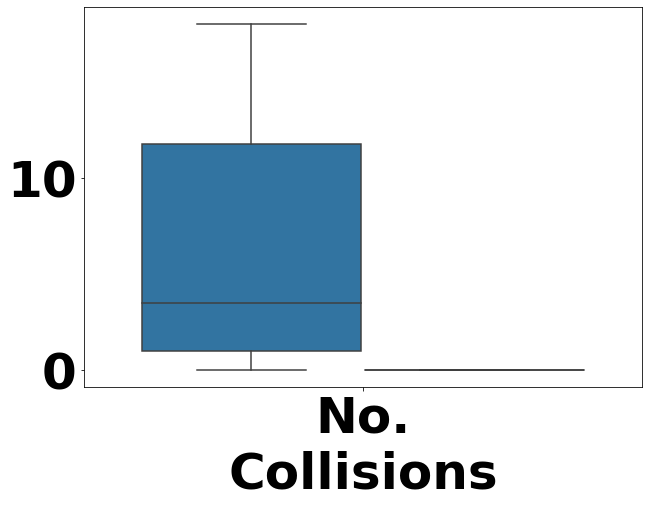

In [13]:
from matplotlib import rc, rcParams

perfect_jobs = list()
perfect_job_rl = list()
perfect_job_grl = list()


SMALL_SIZE = 50
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(10,7))
# ax.legend(handlelength=4, handleheight=4,loc='upper left')

# plt.figure(figsize=(10,10))
sns.set_palette(sns.color_palette("tab10"))

df = pd.read_csv("test_results_case2.csv")
# df1 = pd.read_csv("test_results_random_walk_final.csv")

# df = df.append(df1)

df_z_scaled = df.copy()
  
# apply normalization technique to Column 1
column = 'Reward'
scaler = 20
df[column] = ((df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()) * scaler
  
# view normalized data  
display(df["Reward"])


df["Delay"] = df["Delay"].div(60).round(2)
df["Agent"][:50] = "RL Agent"
df["Agent"][50:100] = "GRL Agent"
df["Agent"][100:150] = "Random Agent"
df["Agent"][150:200] = "FCFS Agent"
#fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data = pd.melt(df, id_vars=["Agent", "Good Takeoffs", "Good Landings", "Battery", "Delay","Reward", "Step Time", "Problem"], var_name="Number")


sns.boxplot(x = data["Number"],y=data["value"], hue=data["Agent"], showfliers=False)


# for legend title
# labels = ax.get_yticklabels()
plt.yticks(fontweight="bold")
plt.xticks([0], ["No.\nCollisions"], fontweight="bold")
labels=["RL Agent", "GRL Agent", "Random Agent", "FCFS Agent"]
ax.get_legend().remove()
plt.xlabel("")
plt.ylabel("")
# plt.ylim(0, 100)
plt.savefig('case2_small_plot_final.png', bbox_inches='tight', pad_inches=0, dpi = 400)  

plt.show()

In [28]:
df = pd.read_csv("test_results_case1.csv")
df["Delay"] = df["Delay"].div(60).round(2)
RL = df[:50]
GRL = df[50:100] 
Random = df[100:150] 
FCFS = df[150:200]

In [31]:
print(RL.std())
print("--------------GRL----------")
print(GRL.std())
print("-------------RL-----------")
print(RL.mean())
print("-------------GRL-----------")
print(GRL.mean())

Reward           47.602200
Collisions        4.242689
Delay             1.438624
Good Takeoffs     3.482258
Good Landings     1.199490
Battery           0.221740
Step Time         0.003414
dtype: float64
--------------GRL----------
Reward           522.714234
Collisions         1.705334
Delay              7.449075
Good Takeoffs     42.217266
Good Landings      3.844105
Battery            3.704859
Step Time          0.009554
dtype: float64
-------------RL-----------
Reward          -1963.600491
Collisions          0.860000
Delay               7.491600
Good Takeoffs       4.580000
Good Landings       2.700000
Battery            26.231132
Step Time           0.057541
dtype: float64
-------------GRL-----------
Reward           565.342812
Collisions         0.300000
Delay              7.396600
Good Takeoffs     79.780000
Good Landings      5.720000
Battery           39.406161
Step Time          0.048123
dtype: float64


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeEr

In [32]:
print(Random.std())
print("-------------FCFS-----------")
print(FCFS.std())
print("-------------Random-----------")
print(Random.mean())
print("------------FCFS------------")
print(FCFS.mean())

Reward           79.821643
Collisions        0.662709
Delay             1.227812
Good Takeoffs     3.260399
Good Landings     5.249723
Battery           1.078096
Step Time         0.002026
dtype: float64
-------------FCFS-----------
Reward           86.703204
Collisions        3.634528
Delay             1.398965
Good Takeoffs     9.623526
Good Landings     4.045103
Battery           1.212706
Step Time         0.003024
dtype: float64
-------------Random-----------
Reward          -1201.488382
Collisions          0.360000
Delay              10.934600
Good Takeoffs      12.680000
Good Landings      28.460000
Battery            17.217759
Step Time           0.058686
dtype: float64
------------FCFS------------
Reward           293.914820
Collisions         2.880000
Delay              5.999000
Good Takeoffs    102.200000
Good Landings    108.380000
Battery           33.098437
Step Time          0.066224
dtype: float64


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeEr

## SciTech Results

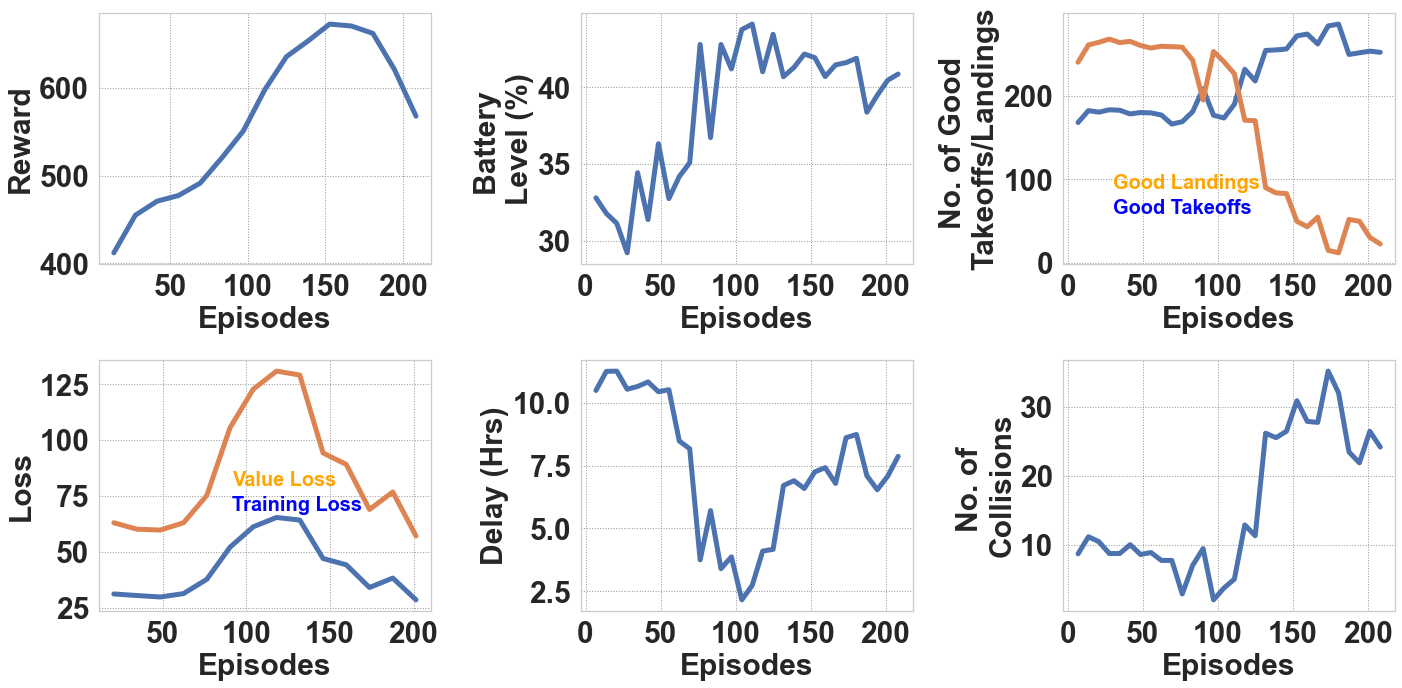

In [54]:
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import seaborn as sns
import pandas as pd
import numpy as np


SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

dfs = dict(
    reward = pd.read_csv("scitech_results/GRL_reward_683.csv"),
    loss = pd.read_csv("scitech_results/GRL_loss_683.csv"),
    val_loss = pd.read_csv("scitech_results/GRL_val_loss_683.csv"),
    ent_loss = pd.read_csv("scitech_results/GRL_entropy_loss_683.csv"),
    delay = pd.read_csv("scitech_results/GRL_delay_683.csv"),
    good_take = pd.read_csv("scitech_results/GRL_good_takeoffs_683.csv"),
    good_land = pd.read_csv("scitech_results/GRL_good_landings_683.csv"),
    battery = pd.read_csv("scitech_results/GRL_mean_battery_683.csv"),
    acollisions = pd.read_csv("scitech_results/GRL_avoided_collisions_683.csv"),
    collisions = pd.read_csv("scitech_results/GRL_collisions_683.csv"),
    )

dfs["delay"]["Value"] = dfs["delay"]["Value"].div(3600).round(2)


fig, axes = plt.subplots(2,3, figsize=(20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
# plt.figure()

for key, df in dfs.items():
    df["Episodes"] = df["Step"] / 1440
    df["Smoothed"] = df["Value"].ewm(alpha=0.4).mean()

#First column
sns.lineplot(data=dfs["reward"], x="Episodes", y="Value", ax=axes[0][0], linewidth=5)
sns.lineplot(data=dfs["loss"], x="Episodes", y="Value", ax=axes[1][0], linewidth=5)
sns.lineplot(data=dfs["val_loss"], x="Episodes", y="Value", ax=axes[1][0], linewidth=5)
axes[1][0].text(0.4, 0.5, "Value Loss", horizontalalignment='left', size='small', color='orange', weight='semibold', transform=axes[1][0].transAxes)
axes[1][0].text(0.4, 0.4, "Training Loss", horizontalalignment='left', size='small', color='blue', weight='semibold', transform=axes[1][0].transAxes)

#Second column
sns.lineplot(data=dfs["battery"], x="Episodes", y="Value", ax=axes[0][1], linewidth=5)
sns.lineplot(data=dfs["delay"], x="Episodes", y="Value", ax=axes[1][1], linewidth=5)


#Third column
sns.lineplot(data=dfs["good_take"], x="Episodes", y="Value", ax=axes[0][2], linewidth=5)
sns.lineplot(data=dfs["good_land"], x="Episodes", y="Value", ax=axes[0][2], linewidth=5)
axes[0][2].text(0.15, 0.3, "Good Landings", horizontalalignment='left', size='small', color='orange', weight='semibold', transform=axes[0][2].transAxes)
axes[0][2].text(0.15, 0.2, "Good Takeoffs", horizontalalignment='left', size='small', color='blue', weight='semibold', transform=axes[0][2].transAxes)

sns.lineplot(data=dfs["collisions"], x="Episodes", y="Value", ax=axes[1][2], linewidth=5)
# sns.lineplot(data=dfs["acollisions"], x="Episodes", y="Value", ax=axes[1][2], linewidth=5)
# axes[1].text(1200, 0.022, "Value Loss", horizontalalignment='left', size='medium', color='orange', weight='semibold')
# axes[1].text(1200, 0.012, "Training Loss", horizontalalignment='left', size='medium', color='blue', weight='semibold')



# axes[1].text(1200, 0.022, "Value Loss", horizontalalignment='left', size='medium', color='orange', weight='semibold')
# axes[1].text(1200, 0.012, "Training Loss", horizontalalignment='left', size='medium', color='blue', weight='semibold')

label_size = 30


axes[0][0].set_ylabel("Reward", fontsize=label_size, fontweight="bold")
axes[0][1].set_ylabel("Battery \nLevel (%)", fontsize=label_size, fontweight="bold")
axes[0][2].set_ylabel("No. of Good \nTakeoffs/Landings", fontsize=label_size, fontweight="bold")
axes[1][0].set_ylabel("Loss", fontsize=label_size, fontweight="bold")
axes[1][1].set_ylabel("Delay (Hrs)", fontsize=label_size, fontweight="bold")
axes[1][2].set_ylabel("No. of \nCollisions", fontsize=label_size, fontweight="bold")




axes[0][0].set_xlabel("Episodes", fontsize=label_size, fontweight="bold")
axes[0][1].set_xlabel("Episodes", fontsize=label_size, fontweight="bold")
axes[0][2].set_xlabel("Episodes", fontsize=label_size, fontweight="bold")
axes[1][0].set_xlabel("Episodes", fontsize=label_size, fontweight="bold")
axes[1][1].set_xlabel("Episodes", fontsize=label_size, fontweight="bold")
axes[1][2].set_xlabel("Episodes", fontsize=label_size, fontweight="bold")



axes[0][0].grid(True)
axes[1][1].grid(True)
# axes[0].set_xlabel("")

# fig.legend(title="Agent", labels=["GRL", "GRL noise"], loc=(0.8, 0.8))
plt.tight_layout()
plt.savefig("scitech_results/Learning_plot.png", dpi=300)


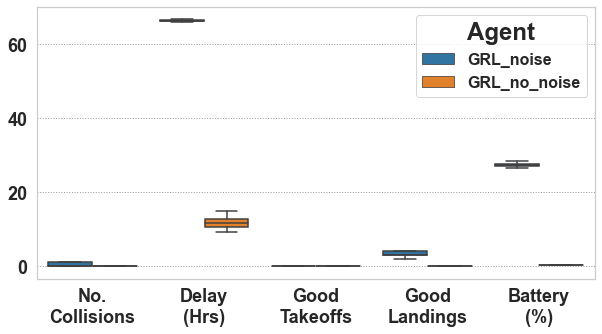

In [27]:
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd

perfect_jobs = list()
perfect_job_rl = list()
perfect_job_grl = list()

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

SMALL_SIZE = 18
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(10,5))
# ax.legend(handlelength=4, handleheight=4,loc='upper left')

# plt.figure(figsize=(10,10))
sns.set_palette(sns.color_palette("tab10"))

df = pd.read_csv("test_results_scitech.csv")
# df1 = pd.read_csv("test_results_random_walk_final.csv")

# df = df.append(df1)

df_z_scaled = df.copy()
  
# apply normalization technique to Column 1
column = 'Reward'
scaler = 20
df[column] = ((df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()) * scaler
  
# view normalized data  
# display(df["Reward"])


df["Delay"] = df["Delay"].div(60).round(2)
# df["Agent"][:50] = "$w_{5} = 0$"
# df["Agent"][50:100] = r"$w_{5} \neq 0$"

#fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data = pd.melt(df, id_vars=["Agent", "Reward","Step Time", "Problem"], var_name="Number")


p = sns.boxplot(x = data["Number"],y=data["value"], hue=data["Agent"], showfliers=False)
p.legend_.set_title("Agent")
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:])

# for legend title
# labels = ax.get_yticklabels()
plt.xticks([0, 1, 2, 3, 4], ["No.\nCollisions", "Delay\n(Hrs)", "Good\nTakeoffs", "Good\nLandings", "Battery\n(%)"], weight="bold")
plt.xlabel("")
plt.ylabel("")
# plt.ylim(0, 100)
plt.legend(title="Agent", prop={"size":16})
plt.savefig('scitech_results/case1_final_plot.png', bbox_inches='tight', pad_inches=0, dpi = 400)  

plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_17020/4015232961.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Case"][150:] = "Case 2"
C:\Users\User\AppData\Local\Temp/ipykernel_17020/4015232961.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Agent"][:50] = "GRL"
C:\Users\User\AppData\Local\Temp/ipykernel_17020/4015232961.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Agent"][50:100] = "Random"
C:\Users\User\Ap

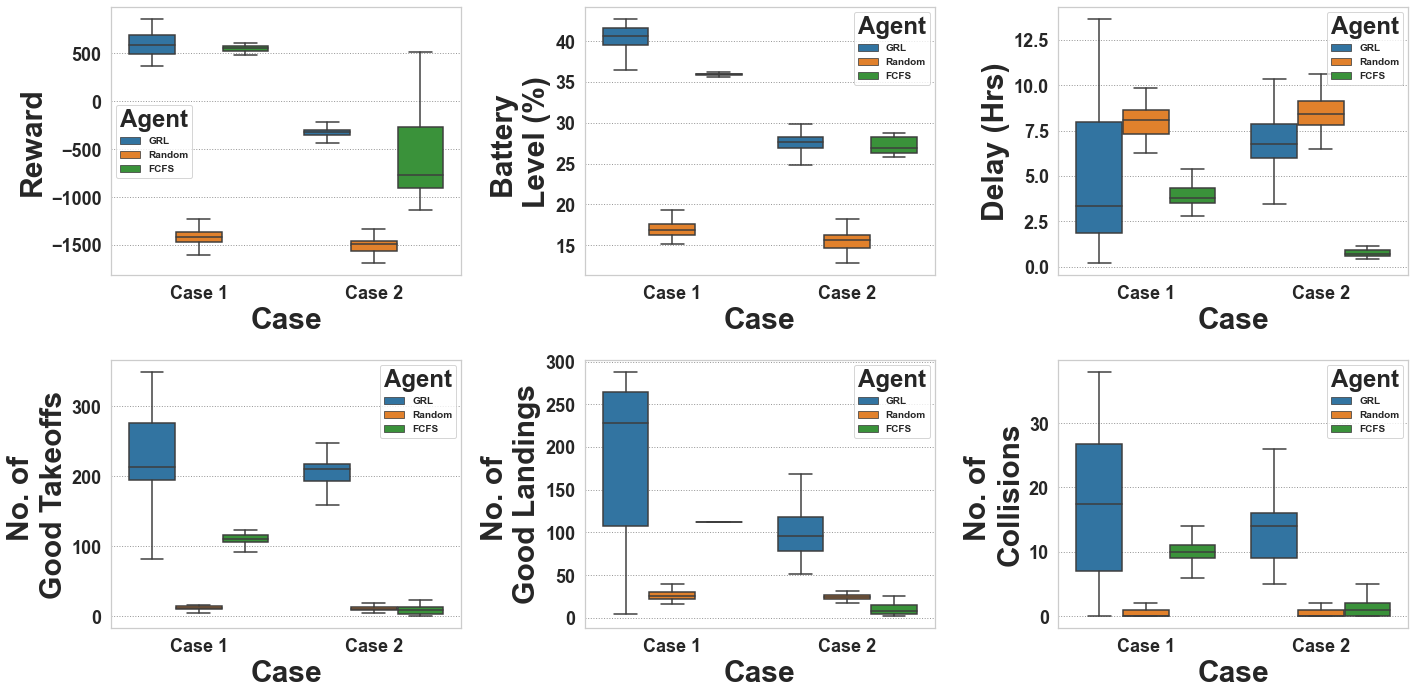

In [82]:
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd

perfect_jobs = list()
perfect_job_rl = list()
perfect_job_grl = list()

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

SMALL_SIZE = 18
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(2,3, figsize=(20,10))
# ax.legend(handlelength=4, handleheight=4,loc='upper left')

# plt.figure(figsize=(10,10))
sns.set_palette(sns.color_palette("tab10"))

df = pd.read_csv("scitech_results/test_results_scitech_noise_no_noise.csv")
df["Case"] = "Case 1"
df["Case"][150:] = "Case 2"

df["Agent"][:50] = "GRL"
df["Agent"][50:100] = "Random"
df["Agent"][100:150] = "FCFS"
df["Agent"][150:200] = "GRL"
df["Agent"][200:250] = "Random"
df["Agent"][250:300] = "FCFS"


# display(df)
# df1 = pd.read_csv("test_results_random_walk_final.csv")

# df = df.append(df1)

df_z_scaled = df.copy()
  
# apply normalization technique to Column 1
# column = 'Reward'
# scaler = 20
# df[column] = ((df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()) * scaler
  
# view normalized data  
# display(df["Reward"])


df["Delay"] = df["Delay"].div(60).round(2)
# df["Agent"][:50] = "$w_{5} = 0$"
# df["Agent"][50:100] = r"$w_{5} \neq 0$"

#fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data = pd.melt(df, id_vars=["Agent", "Reward","Step Time", "Delay", "Collisions", "Good Landings", "Good Takeoffs",  "Problem", "Case"], var_name="Number")
# display(data)


p = sns.boxplot(x = df["Case"],y=df["Reward"], hue=df["Agent"], showfliers=False, ax=ax[0][0])
ax[0][0].set_ylabel("Reward", fontsize=label_size, fontweight="bold")
ax[0][0].set_xlabel("Case", fontsize=label_size, fontweight="bold")
ax[0][0].legend(title="Agent", prop={"size":10})

# p.legend_.set_title("Agent")
# p.legend(fontsize=10)

q = sns.boxplot(x = df["Case"],y=df["Battery"], hue=df["Agent"], showfliers=False, ax=ax[0][1])
# q.legend_.set_title("Agent")
# q.legend(fontsize=10)
ax[0][1].set_ylabel("Battery \nLevel (%)", fontsize=label_size, fontweight="bold")
ax[0][1].set_xlabel("Case", fontsize=label_size, fontweight="bold")
ax[0][1].legend(title="Agent", prop={"size":10})

r = sns.boxplot(x = df["Case"],y=df["Delay"], hue=df["Agent"], showfliers=False, ax=ax[0][2])
# r.legend_.set_title("Agent")
# r.legend(fontsize=10)
ax[0][2].set_ylabel("Delay (Hrs)", fontsize=label_size, fontweight="bold")
ax[0][2].set_xlabel("Case", fontsize=label_size, fontweight="bold")
ax[0][2].legend(title="Agent", prop={"size":10})

s = sns.boxplot(x = df["Case"],y=df["Good Takeoffs"], hue=df["Agent"], showfliers=False, ax=ax[1][0])
# s.legend_.set_title("Agent")
# s.legend(fontsize=10)
ax[1][0].set_ylabel("No. of \nGood Takeoffs", fontsize=label_size, fontweight="bold")
ax[1][0].set_xlabel("Case", fontsize=label_size, fontweight="bold")
ax[1][0].legend(title="Agent", prop={"size":10})

t = sns.boxplot(x = df["Case"],y=df["Good Landings"], hue=df["Agent"], showfliers=False, ax=ax[1][1])
# t.legend_.set_title("Agent")
# t.legend(fontsize=10)
ax[1][1].set_ylabel("No. of \nGood Landings", fontsize=label_size, fontweight="bold")
ax[1][1].set_xlabel("Case", fontsize=label_size, fontweight="bold")
ax[1][1].legend(title="Agent", prop={"size":10})

u = sns.boxplot(x = df["Case"],y=df["Collisions"], hue=df["Agent"], showfliers=False, ax=ax[1][2])
# u.legend_.set_title("Agent")
# u.legend(fontsize=10)
ax[1][2].set_ylabel("No. of \nCollisions", fontsize=label_size, fontweight="bold")
ax[1][2].set_xlabel("Case", fontsize=label_size, fontweight="bold")
ax[1][2].legend(title="Agent", prop={"size":10})
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:])

# for legend title
# labels = ax.get_yticklabels()
# plt.xticks([0, 1, 2, 3, 4], ["No.\nCollisions", "Delay\n(Hrs)", "Good\nTakeoffs", "Good\nLandings", "Battery\n(%)"], weight="bold")
# plt.xlabel("")
# plt.ylabel("")
# plt.ylim(0, 100)
# plt.legend(title="Agent", prop={"size":6})
fig.tight_layout()
plt.savefig('scitech_results/case_study.png', bbox_inches='tight', pad_inches=0, dpi = 400)  

plt.show()

### Action Distribution

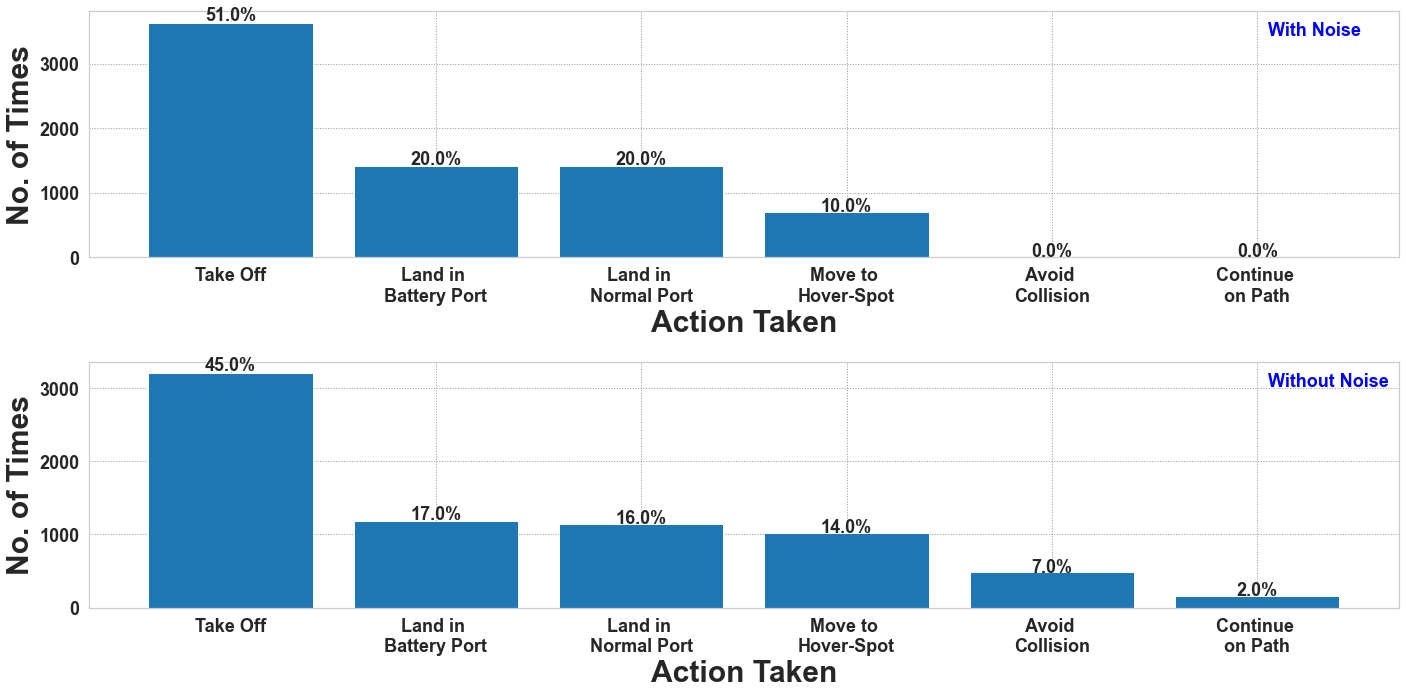

In [136]:
import pandas as pd

actions = pd.read_csv("test_results_scitech_action_distribution.csv")

# display(actions)

group1 = actions["Action"].loc[actions["Case"] == "Case 1"]
group2 = actions["Action"].loc[actions["Case"] == "Case 2"]

fig, ax = plt.subplots(2,1, figsize=(20,10))

actions2 = {0 : "stay still",
            1 : "takeoff",
            2 : "normal-1",
            3 : "normal-2",
            4 : "battery-1",
            5 : "hover-1",
            6 : "hover-2",
            7 : "hover-3",
            8 : "hover-4",
            9 : "continue",
            10 : "avoid collision"}

case1 = group1.value_counts().to_list()
case2 = group2.value_counts().to_list()
p1 = [np.round(x / sum(case1) * 100) for x in case1]
p2 = [np.round(x / sum(case2) * 100) for x in case2]

case1d = group1.value_counts().to_dict()
case2d = group2.value_counts().to_dict()
x1, x2 = [], []
for val1, val2 in zip(list(case1d.keys()), list(case2d.keys())):
    x1.append(actions2[val1])
    x2.append(actions2[val2])
# plt.figure()

plt.sca(ax[0])
graph1 = plt.bar(x=x1, height=case1)
ax[0].set_ylabel("No. of Times", fontsize=label_size, fontweight="bold")
ax[0].set_xlabel("Action Taken", fontsize=label_size, fontweight="bold")
ax[0].text(0.9, 0.9, "With Noise", horizontalalignment='left', size='medium', color='blue', weight='semibold', transform=ax[0].transAxes)
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(["Take Off", "Land in \nBattery Port", "Land in \nNormal Port", "Move to \nHover-Spot", "Avoid \nCollision", "Continue \non Path"])

i = 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(p1[i])+'%',
             ha='center',
             weight='bold')
    i+=1


plt.sca(ax[1])
graph2 = plt.bar(x=x2, height=case2)
ax[1].set_ylabel("No. of Times", fontsize=label_size, fontweight="bold")
ax[1].set_xlabel("Action Taken", fontsize=label_size, fontweight="bold")
ax[1].text(0.9, 0.9, "Without Noise", horizontalalignment='left', size='medium', color='blue', weight='semibold', transform=ax[1].transAxes)
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(["Take Off", "Land in \nBattery Port", "Land in \nNormal Port", "Move to \nHover-Spot", "Avoid \nCollision", "Continue \non Path"])

 

i = 0
for p in graph2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(p2[i])+'%',
             ha='center',
             weight='bold')
    i+=1
fig.tight_layout()
plt.savefig("scitech_results/action_distribution.png", bbox_inches='tight', pad_inches=0, dpi = 400)
plt.show()
